In [152]:
import pandas as pd
from pathlib import Path

In [153]:
file_path = Path("../Resources/crypto_data.csv")
crypto_data_df = pd.read_csv(file_path)

crypto_data_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [154]:
# Remove the CoinName Column
crypto_data_df = crypto_data_df.drop(columns=["Unnamed: 0","CoinName"])
crypto_data_df.head()

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,True,PoW/PoS,4.199995e+01,42
1,X11,True,PoW/PoS,NaN,2300000000
2,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SHA-256,True,PoW,NaN,611000
4,SHA-256,True,PoW/PoS,0.000000e+00,0


In [155]:
crypto_data_df.dtypes

Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [156]:
crypto_data_df['IsTrading'] = df['IsTrading'].apply(str)

In [157]:
# Filter Cryptocurrencies Not Being Traded

def changeStatus(status):
    if status == "True":
        return 1
    else:
        return 0
    
crypto_data_df["IsTrading"] = crypto_data_df["IsTrading"].apply(changeStatus)
crypto_data_df

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,1,PoW/PoS,4.199995e+01,42
1,X11,1,PoW/PoS,NaN,2300000000
2,Scrypt,1,PoW/PoS,1.055185e+09,532000000
3,SHA-256,1,PoW,NaN,611000
4,SHA-256,1,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
1247,Scrypt,1,PoS,1.283270e+05,1000000
1248,Scrypt,0,PoW/PoS,2.149121e+07,100000000
1249,Scrypt,0,PoW/PoS,NaN,233100000
1250,SHA-256,0,PoW/PoS,NaN,21000000


In [158]:
# Remove "Not Trading" Row

crypto_true_df = crypto_data_df.loc[crypto_data_df['IsTrading'] == 1]

crypto_true_df

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,1,PoW/PoS,4.199995e+01,42
1,X11,1,PoW/PoS,NaN,2300000000
2,Scrypt,1,PoW/PoS,1.055185e+09,532000000
3,SHA-256,1,PoW,NaN,611000
4,SHA-256,1,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
1243,Ethash,1,PoW,NaN,1000000000
1244,SHA-256,1,DPoI,NaN,1000000000
1245,CryptoNight,1,PoW,9.802226e+08,1400222610
1246,Equihash,1,PoW,7.296538e+06,21000000


In [159]:
crypto_cleaned_df = crypto_true_df.drop(columns=['IsTrading'])

crypto_cleaned_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
1,X11,PoW/PoS,NaN,2300000000
2,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SHA-256,PoW,NaN,611000
4,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...
1243,Ethash,PoW,NaN,1000000000
1244,SHA-256,DPoI,NaN,1000000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [160]:
# Remove Null Values

for column in crypto_cleaned_df.columns:
    print(f"Column {column} has {crypto_cleaned_df[column].isnull().sum()} null values")

Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [161]:
crypto_final_df = crypto_cleaned_df.dropna()

crypto_final_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [162]:
# Filter TotalCoinsMined > 0

crypto_mined_df = crypto_final_df[crypto_final_df.TotalCoinsMined > 0 ]

crypto_mined_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [163]:
# GetDummies for Numerical Data

crypto_dummies = pd.get_dummies(crypto_mined_df, columns=['Algorithm', 'ProofType'])

crypto_dummies

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
# Standardize Data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

crypto_scaled = scaler.fit_transform(crypto_dummies)

crypto_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [165]:
# Initialize PCA model
from sklearn.decomposition import PCA

pca = PCA(n_components=.9)

# Get the principal components for the crypto data.
crypto_pca = pca.fit_transform(crypto_scaled)

crypto_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
         9.57234205e-16, -2.11469414e-15,  8.76221761e-16],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
         2.28533713e-15, -1.73100279e-15,  8.82823293e-16],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
        -3.51037842e-14,  1.06482358e-13, -6.60916271e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
         9.98793284e-15,  5.10697505e-14, -1.02007349e-13],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
         3.90049046e-15, -2.42369869e-15,  9.92265708e-17],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         6.51071425e-16, -1.57133933e-15,  3.65596727e-15]])

In [166]:
# Initialize t-SNE Model
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE()

tsne_features = tsne.fit_transform(crypto_pca)

In [167]:
tsne_features.shape

(532, 2)

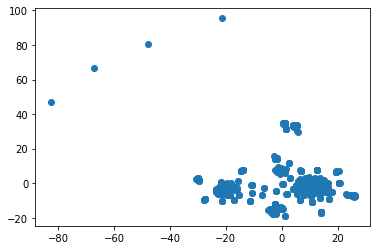

In [168]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])

plt.show()

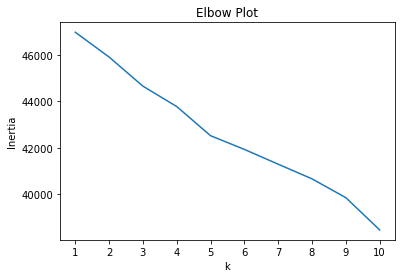

In [169]:
# K-Means
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.title("Elbow Plot")
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [170]:
# "Based on the outliers and non-convex shapes in the plotted cluster data, my recommendation 
# is that you cannot cluster cryptocurrencies together."